In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder    
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt 
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
%matplotlib inline

df = (pd.read_excel("default of credit card clients.xls",skiprows=1).dropna(how='all', axis=1))



In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("dimension of credit data: {}".format(df.shape) )

dimension of credit data: (30000, 25)


In [4]:
print(df.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.rename(columns={"default payment next month": "default"}, inplace = True)

In [7]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

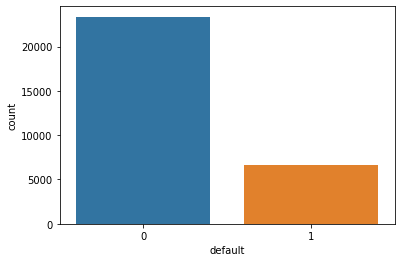

In [8]:
sns.countplot(df['default'],label="Count")

In [9]:
#X = credit.loc[:, credit.columns != 'default.payment.next.month']
#y = credit.loc[:, credit.columns == 'default.payment.next.month']
X = df.drop('default', axis=1)
y = df['default']
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
columns = X.columns

os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no default in oversampled data",len(os_data_y[os_data_y['default']==0]))
print("Number of default",len(os_data_y[os_data_y['default']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['default']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default']==1])/len(os_data_X))
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {os_data_X.shape}''')
print('\nBalance of positive and negative classes (%):')
os_data_y.value_counts(normalize=True) * 100

length of oversampled data is  46728
Number of no default in oversampled data 23364
Number of default 23364
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5
Shape of X before SMOTE: (30000, 24)
Shape of X after SMOTE: (46728, 24)

Balance of positive and negative classes (%):


default
0          50.0
1          50.0
dtype: float64

In [10]:
X=os_data_X
y=os_data_y

In [11]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
#train_ratio = 0.80
test_ratio = 0.10
#validation_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print(X_train.shape), print(y_train.shape)
#print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(37382, 24)
(37382, 1)
(9346, 24)
(9346, 1)


(None, None)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
# Fitting Random Forest Classification to the Training set
classifier_rfc = RandomForestClassifier(n_estimators = 100 ,random_state=100)
classifier_rfc.fit(X_train, np.ravel(y_train))
# Predicting the Test set results
y_pred = classifier_rfc.predict(X_test)

#Generating evaluation Metrics
report_rfc_word_features = classification_report(y_test, y_pred)
matrix_rfc_word_features = confusion_matrix(y_test, y_pred)
print("The Classification Report")
print(report_rfc_word_features)
print("The Confusion Matrix")
pd.DataFrame(matrix_rfc_word_features)

The Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4673
           1       0.86      0.83      0.85      4673

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346

The Confusion Matrix


,0,1
0,4049,624
1,792,3881


In [13]:
# Performance metrics
y_pred=y_pred.reshape(9346,1)
errors = abs(y_pred - y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')



Metrics for Random Forest Trained on Original Data
Average absolute error: default    0.15
dtype: float64 degrees.


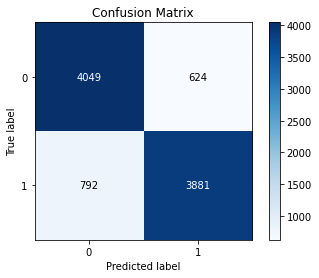

In [14]:
confusion_matrix = confusion_matrix(y_test,y_pred)

skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()